<a href="https://colab.research.google.com/github/deusimardamiao/processamento_digital_imagens/blob/master/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive, files
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


## **Carregando uma imagem**

---



(2848, 4288, 3)


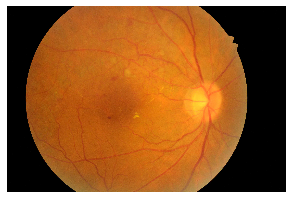

In [12]:
from skimage.io import imread # função do pacote skimage para leitura de imagens
import matplotlib.pyplot as plt # função do pacote matplotlib para mostrar as imagens na tela
path_to_image = '/content/gdrive/My Drive/dataset/retina.jpg' # endereço da imagem a se carregada
imagem = imread(path_to_image) # leitura da imagem
plt.figure(figsize=(5, 10)) # define o tamanho da janela onde a imagem será mostrada
plt.imshow(imagem) # mostrando imagem carregada na tela
plt.axis('off')
print(imagem.shape) # o atributo shape mostra a forma da imagem em (altura, largura, dimensão)

In [8]:
from skimage.io import imread_collection # função do pacote skimage para carregar n imagens

extensao = '/content/gdrive/My Drive/dataset/*.jpg' # endereço das imagens seguido de *.extensao_da_imagem para carregar todos os arquivos dessa extensão

imagens = imread_collection(extensao) # carregando as imagens
len(imagens) # verificando a quantidade de imagens carregadas

for imagem in imagens: # iterando sobre a lista de imagens carregadas
  print(imagem.shape)

(430, 500, 3)
(430, 500, 3)
(2848, 4288, 3)
(2848, 4288)
(2848, 4288)
(2848, 4288, 3)


## **Salvar imagem**

---



In [0]:
from skimage.io import imsave # função do pacote skimage para salvar de imagens


path_to_image = '/content/gdrive/My Drive/dataset/imagem_salvar.jpg' # endereço
# para salvar a imagem

imsave(path_to_image, imagem) # salvando a imagem

## **Extraindo os canais**

---



In [0]:
fig = plt.figure(figsize=(15,30)) # Definindo a figura e seu tamanho

canal_vermelho = imagem.copy() # Definindo que o plot terá 1 linha, 3 imagens, e essa será a 1ª imagem:
canal_vermelho[..., 1] = 0 # zerando o canal verde
canal_vermelho[..., 2] = 0 # zerando o canal azul
a = fig.add_subplot(1, 3, 1) # fazendo plot a imagem
a.axis('off')
a.set_title('Vermelho')
a.imshow(canal_vermelho)

canal_verde = imagem.copy()
canal_verde[..., 0] = 0
canal_verde[..., 2] = 0
b = fig.add_subplot(1, 3, 2)
b.axis('off')
b.set_title('Verde')
b.imshow(canal_verde)

canal_azul = imagem.copy()
canal_azul[..., 0] = 0
canal_azul[..., 1] = 0
c = fig.add_subplot(1, 3, 3)
c.axis('off')
c.set_title('Azul')
c.imshow(canal_azul)


## **Plotando as imagens**

---



In [0]:
linhas, colunas = 2, 2 # definindo quantidade de linhas e colunas desejadas

In [0]:
# --------- primeira maneira de plotar as imagens ---------
fig, ax = plt.subplots(linhas, colunas, figsize=(10, 20)) # criando a figura
fig.subplots_adjust(bottom=0.1, top=0.4) # definindo estilo
# definindo cada posição desejada
ax[0,0].set_title('Original') # título da imagem
ax[0,0].axis('off')
ax[0,0].imshow(imagem)
ax[0,1].set_title('Vermelho')
ax[0,1].axis('off')
ax[0,1].imshow(canal_vermelho)
ax[1,0].set_title('Verde')
ax[1,0].axis('off')
ax[1,0].imshow(canal_verde)
ax[1,1].set_title('Azul')
ax[1,1].axis('off')
ax[1,1].imshow(canal_azul)

In [0]:
# --------- segunda maneira de plotar as imagens ---------
# cria-se uma lista com as imagens para plot
imagens = [imagem, canal_vermelho, canal_verde, canal_azul]
# cria-se uma lista de titulos para as imagens do plot
titulos = ['Original', 'Vermelho', 'Verde', 'Azul']

fig = plt.figure(figsize=(10, 20))
for i in range(1, colunas*linhas +1):
    fig.add_subplot(linhas, colunas, i)
    plt.imshow(imagens[i-1])
    plt.title(titulos[i-1])
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1, top=0.4)

plt.show()

## **Níveis de cinza**

---

In [0]:
from skimage.color import rgb2gray # função para converter imagens rgb para níveis de cinza
imagem_cinza = rgb2gray(imagem) # convertendo a imagem
fig, ax = plt.subplots(1, 2, figsize=(10, 20)) # plotando o resultado
ax[0].imshow(imagem)
ax[0].axis('off')
ax[0].set_title('Imagem original')
ax[1].imshow(imagem_cinza, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Imagem em níveis de Cinza')

## **Remoção de ruídos**

---



### Remoção de ruídos com o filtro da mediana

In [0]:
from skimage.filters.rank import median
from skimage.morphology import disk
import numpy as np 
from skimage import img_as_ubyte # função que converte uma imagem para bytes com valores entre 0 e 255
from skimage import data # banco de imagens do skimage

imagem_ruido = img_as_ubyte(data.camera()) # carrega uma imagem da base de dados do Skimage
ruido = np.random.random(imagem_ruido.shape)  # escolhe pontos aleatórios para serem os ruídos

# aplicando ruídos na imagem
imagem_ruido[ruido > 0.96] = 255 # define 96% dos pixels como branco
imagem_ruido[ruido < 0.04] = 0 # define 4% dos pixels como preto

# aplica filtro da mediana variando o valor da mediana
imagem_mediana_1 = median(imagem_ruido, disk(1))
imagem_mediana_2 = median(imagem_ruido, disk(2))
imagem_mediana_15 = median(imagem_ruido, disk(15))

fig, ax = plt.subplots(2, 2, figsize=(15, 8), sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(imagem_ruido, 'gray')
ax1.set_title('Imagem com ruído')
ax1.axis('off')

ax2.imshow(imagem_mediana_1, cmap='gray')
ax2.set_title('Mediana = 1')
ax2.axis('off')

ax3.imshow(imagem_mediana_2, cmap='gray')
ax3.set_title('Mediana = 2')
ax3.axis('off')

ax4.imshow(imagem_mediana_15, cmap='gray')
ax4.set_title('Mediana = 15')
ax4.axis('off')


### Remoção de ruídos com o filtro square

In [0]:
from skimage.morphology import square

# aplicando square para retirar os ruídos da imagem com diferentes parâmetros
imagem_saqure_1 = median(imagem_ruido, square(1))
imagem_saqure_3 = median(imagem_ruido, square(3))
imagem_saqure_10 = median(imagem_ruido, square(10))

fig, ax = plt.subplots(2, 2, figsize=(15, 8), sharex=True, sharey=True)
ax1, ax2, ax3, ax4 = ax.ravel()

ax1.imshow(imagem_ruido, 'gray')
ax1.set_title('Imagem com ruído')
ax1.axis('off')

ax2.imshow(imagem_saqure_1, cmap='gray')
ax2.set_title('Square = 1')
ax2.axis('off')

ax3.imshow(imagem_saqure_3, cmap='gray')
ax3.set_title('Square = 3')
ax3.axis('off')

ax4.imshow(imagem_saqure_10, cmap='gray')
ax4.set_title('Square = 10')
ax4.axis('off')